# Task 1

In [1]:
using Yao, Yao.AD, YaoExtensions

## The ansatz

In [2]:
even_block(θ) = chain(4, 
                [put(i=>Rz(θ[i])) for i in 1:4]...,
                [control(i, j=>Z) for j in 1:4, i in 1:4 if j>i]...)

odd_block(θ) = chain(4, [put(i=>Rx(θ[i])) for i in 1:4]...)

layer(θ) = chain(4, odd_block(θ[:,1]), even_block(θ[:,2]))

ansatz(L, θ) = chain(4, [layer(θ[:,:,i]) for i in 1:L])

# Run the circuit to ensure it's set up properly
zero_state(4) |> ansatz(1, rand(4,4,1)) |> statevec;

## Training

In [3]:
ensemble = []
@time for L in 1:10
    circuit = ansatz(L, zeros(4,4,L)*2π)

    ψ = rand_state(4)

    learning_rate(t) = exp(-0.005t)

    convergence = []
    for t in 1:500
        out = zero_state(4) |> circuit
        outδ = ψ - out
        _, paramsδ = apply_back((out, outδ), circuit)
        dispatch!(+, circuit, learning_rate(t) * paramsδ)
        push!(convergence, sum(abs.(statevec(outδ))))
    end
    
    @show L, nparameters(circuit), convergence[end]

    push!(ensemble, convergence)
end

(L, nparameters(circuit), convergence[end]) = (1, 8, 2.976839099954633)
(L, nparameters(circuit), convergence[end]) = (2, 16, 1.6901606960381048)
(L, nparameters(circuit), convergence[end]) = (3, 24, 0.860684838100214)
(L, nparameters(circuit), convergence[end]) = (4, 32, 0.42172717326917747)
(L, nparameters(circuit), convergence[end]) = (5, 40, 0.2904561746847508)
(L, nparameters(circuit), convergence[end]) = (6, 48, 0.1311178482841524)
(L, nparameters(circuit), convergence[end]) = (7, 56, 0.00896900095509044)
(L, nparameters(circuit), convergence[end]) = (8, 64, 0.017080510599180407)
(L, nparameters(circuit), convergence[end]) = (9, 72, 0.0022893032217458677)
(L, nparameters(circuit), convergence[end]) = (10, 80, 0.028122838935161196)
  7.672435 seconds (66.31 M allocations: 3.373 GiB, 6.14% gc time)


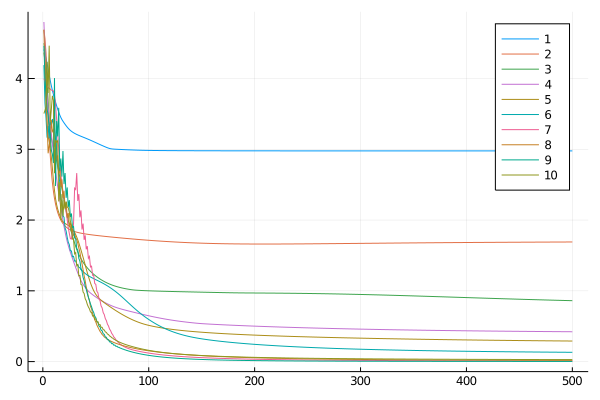

In [4]:
using Plots
plot(ensemble, labels=collect(1:10)')

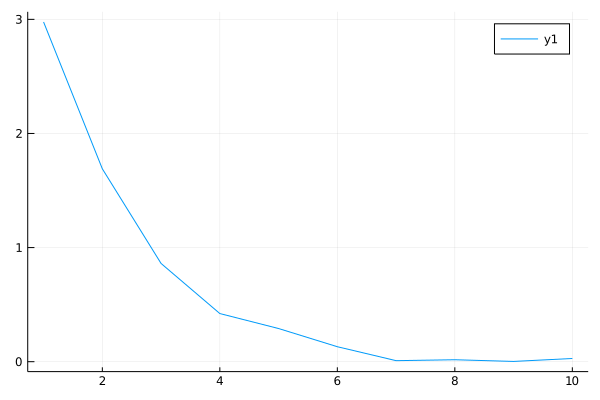

In [5]:
plot(transpose(hcat(ensemble...))[:,end])

# References

**Yao.jl: Extensible, Efficient Framework for Quantum Algorithm Design** - https://arxiv.org/abs/1912.10877